In [48]:
# from sklearn import svm,metrics
from sklearn.linear_model import LinearRegression   # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

무게, 길이, 대각선, 높이, 너비
어떤 물고기인지 분류하는 모델 구현

In [49]:
df = pd.read_csv('https://bit.ly/fish_csv')
df.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [50]:
df.shape

(159, 6)

In [51]:
# data, target 분리
fish_input = df.iloc[:,1:].to_numpy()
fish_target = df['Species']

In [52]:
# train, test 세트 분리
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [53]:
df.columns
# Weight', 'Length', 'Diagonal', 'Height', 'Width' 
# 다섯가지를 표준화 함

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [54]:
# 표준화 작업
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [55]:
# 학습
# from sklearn.linear_model import LogisticRegression
# lr = LogisticRegression()
# lr.fit(train_scaled,train_target)

In [56]:
# 결과
# print(lr.score(train_scaled,train_target))
# print(lr.score(test_scaled,test_target))

경사하강법

In [57]:
# 경사 하강법: 머신러닝을 훈련하는 방법, 최적화 방법
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


In [58]:
# loss = 회귀(예측) 함수 가져와서 적용
sc = SGDClassifier(loss='log_loss',max_iter=100,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8403361344537815
0.8


In [59]:
# 재훈련 가능
# partial_fit: 이전기울기, y절편으로 다시 학습.
sc.partial_fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.907563025210084
0.925


에포크, 과대/과소적합 문제

In [60]:
# 그래프를 그리기 위한 리스트
train_score = []
test_score = []

classes = np.unique(train_target)

In [61]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [64]:
# 훈련
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    sc1=sc.score(train_scaled, train_target)
    train_score.append(sc1)
    sc2=sc.score(test_scaled,test_target)
    test_score.append(sc2)

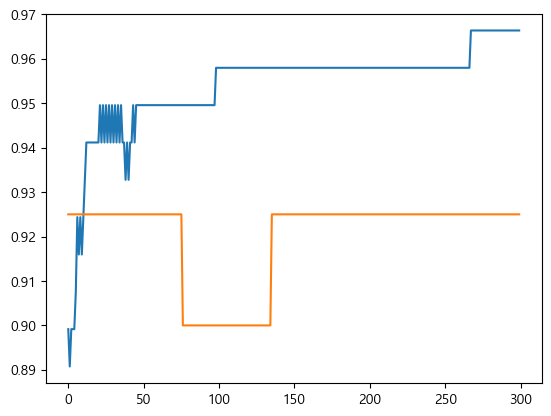

In [65]:
plt.plot(train_score)
plt.plot(test_score)

In [70]:
# tol=None : max_iter=100 만큼 반복시켜준다.
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))


0.957983193277311
0.925


In [71]:
# 경사하강법:
# 반복해서 머신러닝 훈련, 정답률을 높여준다.